#Data Cleaning

1. Check the quality of the data
2. perform data cleaning
3. plot several plots and explain what is happening


In [1]:
import kagglehub
import pandas as pd
from pathlib import Path
import os

dataset_path= kagglehub.dataset_download('zahidmughal2343/amazon-sales-2025')
dataset_path = Path(dataset_path)
files = os.listdir(dataset_path)
print(files)

['amazon_sales_data 2025.csv']


In [2]:
import pandas as pd
data = pd.read_csv(dataset_path / 'amazon_sales_data 2025.csv')
data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
data.shape

(250, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [5]:
data['Date']= pd.to_datetime(data['Date'])

<ipython-input-5-103c776076b1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']= pd.to_datetime(data['Date'])


In [6]:
data.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [7]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
245,False
246,False
247,False
248,False


In [8]:
data.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

#Plots

1. Bar grapgh showing product and Total sell to show product with high sells
2. Relationship btn payment method and product
3. plot showing Total sales
4. Location and and Product sells
5. showing Total Sales over Time


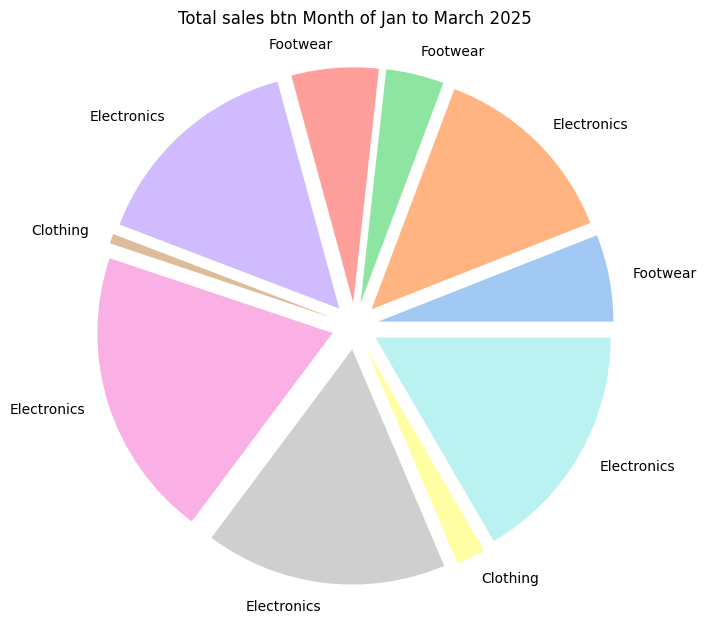

In [9]:
#Total prices
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('_mpl-gallery')

Total_price = data[['Total Sales','Category']].head(10)
plt.figure(figsize = (10,6))
explode = [0.1] * len(Total_price)
colors = sns.color_palette("pastel", len(Total_price))
plt.pie(Total_price['Total Sales'], labels=Total_price['Category'], explode=explode, colors=colors)
plt.title("Total sales btn Month of Jan to March 2025")
plt.show()



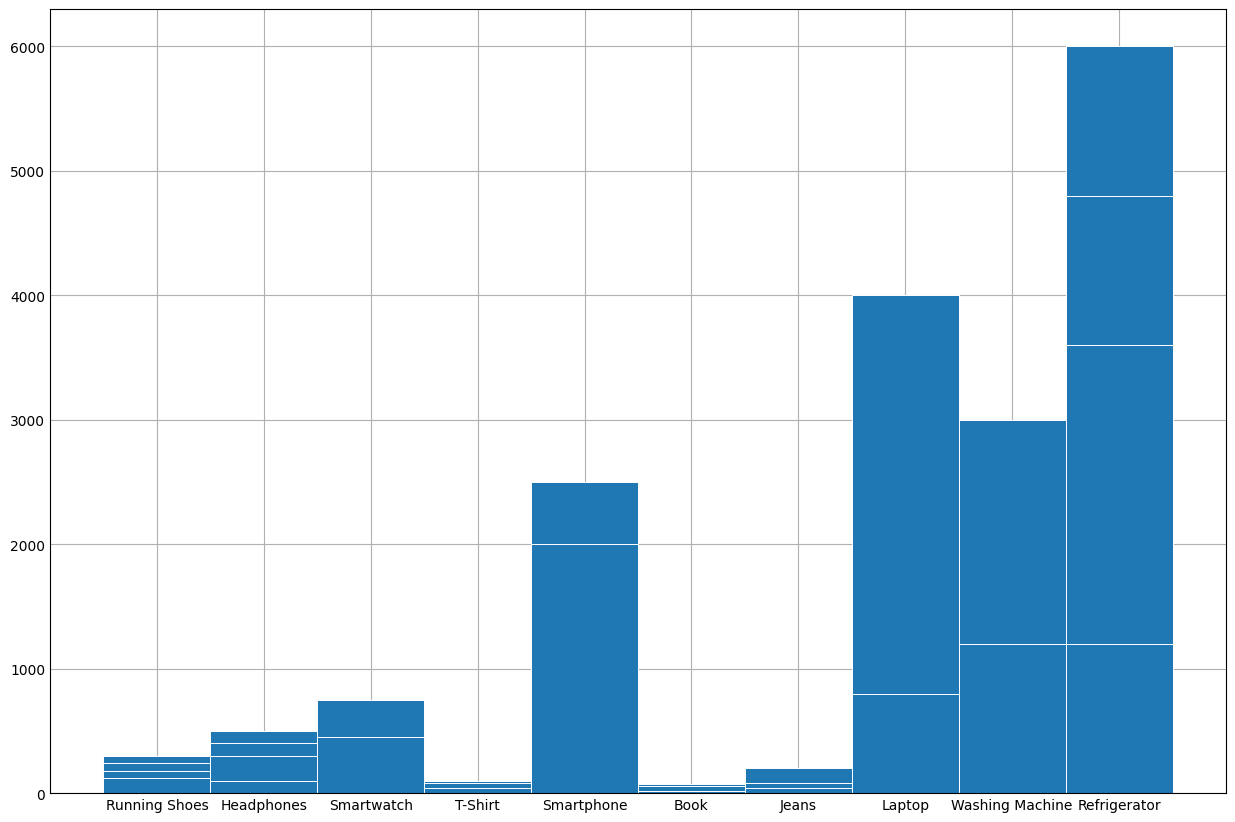

In [10]:
#Bar grapgh showing product and Total sell to show product with high sells
plt.figure(figsize=(12,8))
plt.bar(data['Product'], data['Total Sales'], width =1, edgecolor='white', linewidth=0.7)
plt.show()


<ipython-input-11-cc4041e709a5>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(data['Price'], data['Quantity'], c=colors , vmin=0,vmax=100)


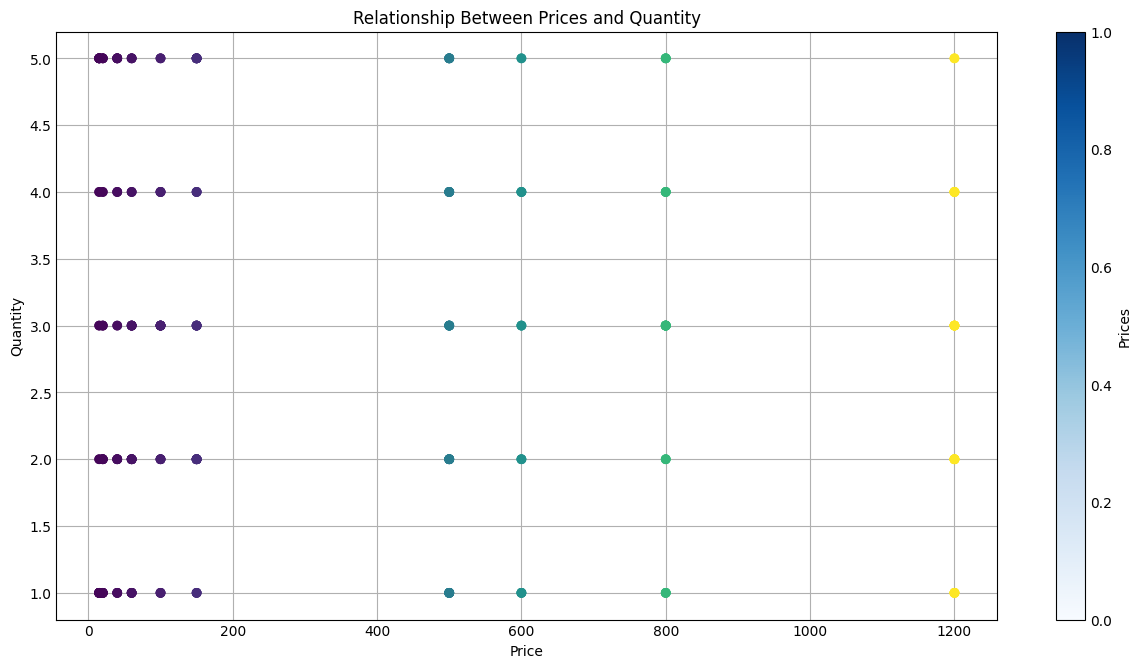

In [11]:
#Relationship btn payment method and product
plt.figure(figsize = (12, 6))

colors = plt.cm.viridis(data['Price']/data['Price'].max())


plt.scatter(data['Price'], data['Quantity'], c=colors , vmin=0,vmax=100)
plt.colorbar(label='Prices')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title("Relationship Between Prices and Quantity")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

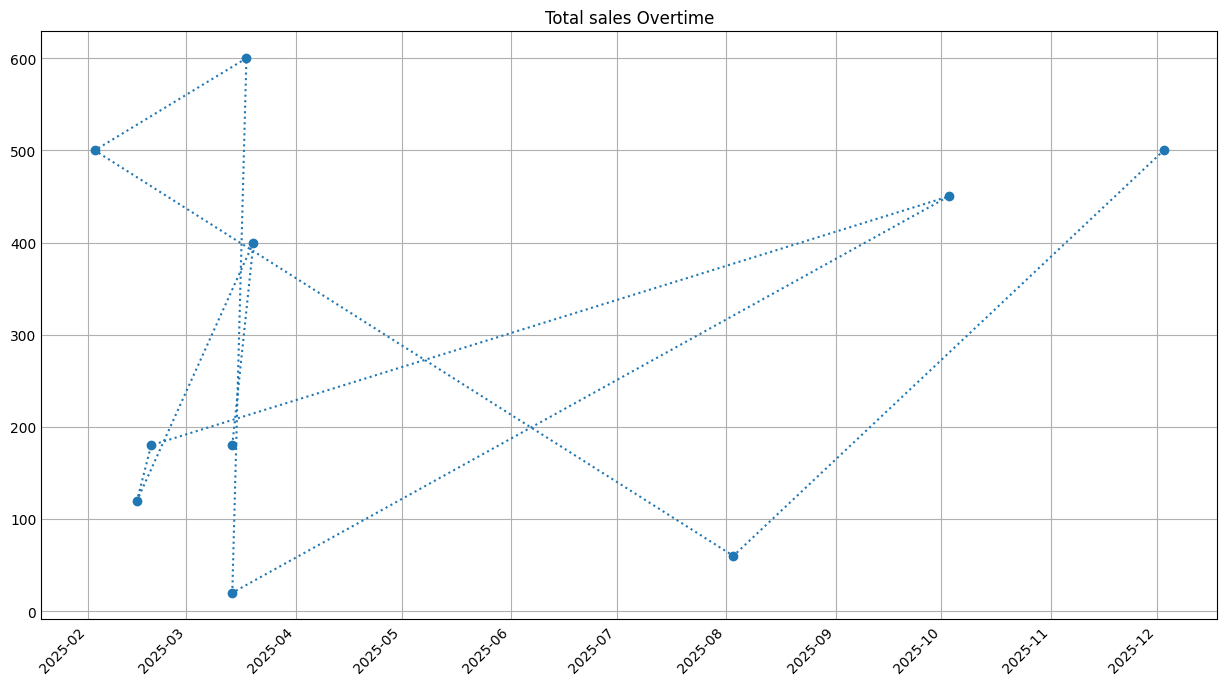

In [12]:
Top_10 = data[['Date', 'Total Sales']].head(10)
plt.figure(figsize=(12,6))
plt.plot(Top_10['Date'], Top_10['Total Sales'], linestyle='dotted', marker= 'o')
plt.xticks(rotation=45, ha='right')
plt.title("Total sales Overtime")
plt.show

Text(0.5, 1.0, 'Location and Product sale ')

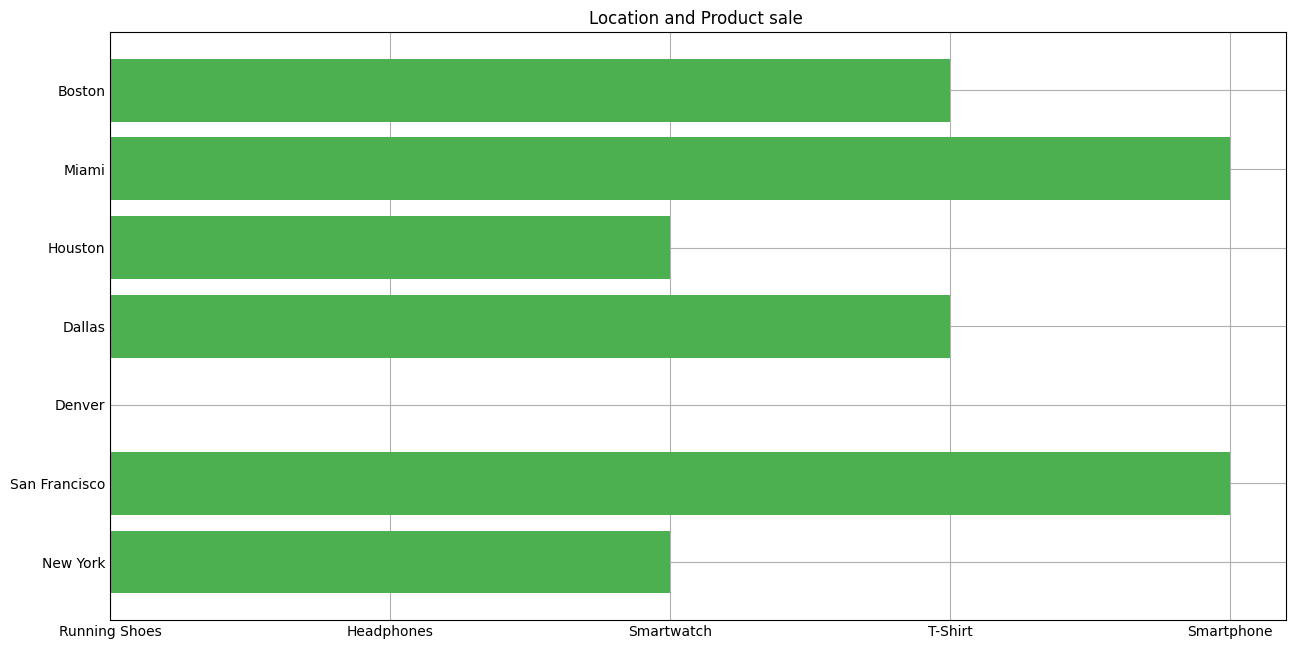

In [13]:
#Location and and Products
Top_location = data[['Customer Location', 'Product']].head(10)
plt.figure(figsize= (12,6))
plt.barh(Top_location['Customer Location'], Top_location['Product'] , color= "#4CAF50")
plt.title("Location and Product sale ")
